In [1]:
#importing neccesary file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
loan = pd.read_csv('loan_prediction.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 13)

In [4]:
#checking the dataset information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### From above we can observe that dataset has 4 float,1 integer and 8 objects 

In [5]:
#checking for nullvalues
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#All are catagorical variable if try to fill these null values we may not get the accurat values.Because here,we need to
# predict the loan application status.So,Im going to delete all null values
loan = loan.dropna()

In [7]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
#statistical Caliculation of loan
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [9]:
#Before we are going to visualize we need to encode 'Loan_status'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan['Loan_Status'] = le.fit_transform(loan['Loan_Status'])

In [10]:
loan['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [11]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


##### From the above we can obvere that  loan_status values are like for 'Y' :1 and for 'N':0 

### visualization


In [12]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
# Gender VS LoanStatus
loan['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

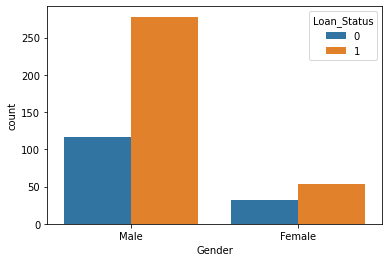

In [14]:
sns.countplot(x='Gender',data=loan,hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

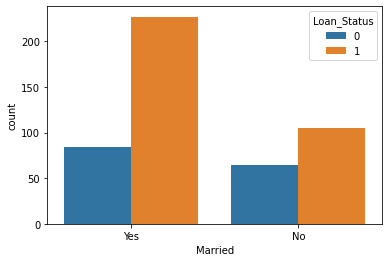

In [15]:
# Married VS LoanStatus
sns.countplot(x='Married',data=loan,hue='Loan_Status')

In [16]:
# Dependents Vs LoanStatus
loan['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [17]:
loan= loan.replace(to_replace='3+',value = 4)

In [18]:
loan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

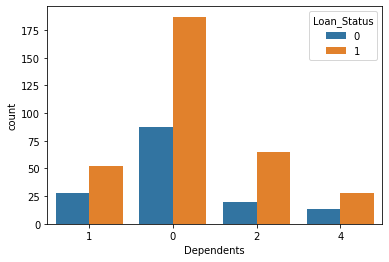

In [19]:
sns.countplot(x='Dependents',data=loan,hue='Loan_Status')

In [20]:
#Education VS LoanStatus
loan['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

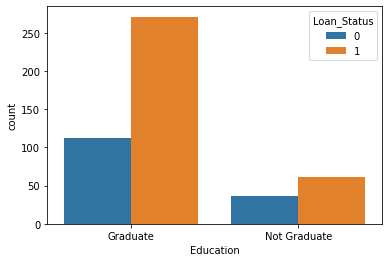

In [21]:
sns.countplot(x='Education',data=loan,hue='Loan_Status')

In [22]:
# Self_Employed VS Loan_Status
loan['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

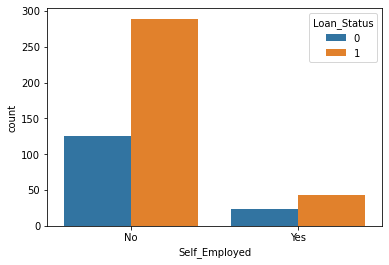

In [23]:
sns.countplot(x='Self_Employed',data=loan,hue='Loan_Status')

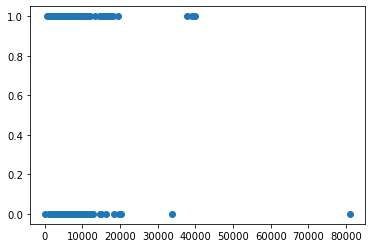

In [24]:
# ApplicantIncome vs LoanStatus
plt.scatter(loan['ApplicantIncome'], loan['Loan_Status'])

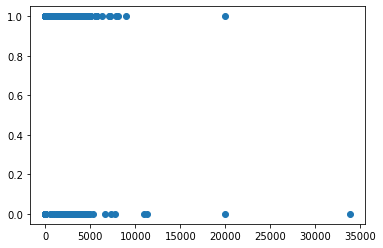

In [25]:
# 'CoapplicantIncome' Vs Loan_Status
plt.scatter(loan['CoapplicantIncome'], loan['Loan_Status'])

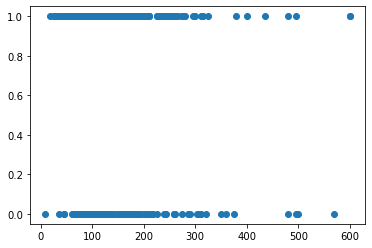

In [26]:
# LoanAmount Vs Loan_Status
plt.scatter(loan['LoanAmount'], loan['Loan_Status'])

In [27]:
# Credit_History Vs Loan_Status
loan['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

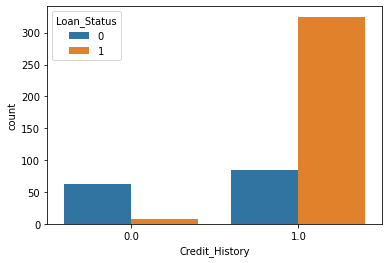

In [28]:
sns.countplot(x='Credit_History',data=loan,hue='Loan_Status')

In [29]:
# Property_Area VS Loan_Status
loan['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

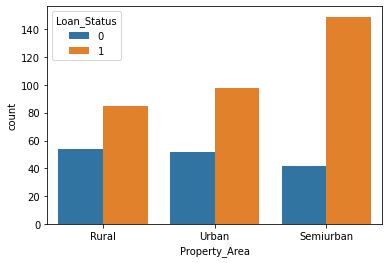

In [30]:
sns.countplot(x='Property_Area',data=loan,hue='Loan_Status')

In [31]:
#For Feature process we need to convert catagorical columns into numeric.so,for that lets check what are the catagorical
# and numeric
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [32]:
loan['Gender'] = le.fit_transform(loan['Gender'])

In [33]:
loan['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [34]:
loan['Married'] = le.fit_transform(loan['Married'])

In [35]:
loan['Education'] = le.fit_transform(loan['Education'])

In [36]:
loan['Self_Employed'] = le.fit_transform(loan['Self_Employed'])

In [37]:
loan['Property_Area'] = le.fit_transform(loan['Property_Area'])

In [38]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [39]:
#dropping the unnecessary column
loan.drop('Loan_ID',axis=1,inplace=True)

In [40]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [41]:
# Correlation 
loan.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,0.059245,0.001652,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,-0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000,0.031361


In [42]:
# Divide the target and feature columns
X = loan.drop(columns ='Loan_Status')

In [43]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [44]:
Y = loan['Loan_Status']

In [45]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32

In [46]:
#Scaling the data using minmax scaler
from sklearn.preprocessing import MinMaxScaler

mms =MinMaxScaler()
x_scaled = mms.fit_transform(X)

In [47]:
#traing the model
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

maxAccu =0
maxRs =0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_scaled,Y,test_size =.20,random_state=i)
    lr = LogisticRegression()  
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu :
        maxAccu =acc
        maxRs =i
print("Best accuracy is:",maxAccu,"On Random state:",maxRs)

pred_lr=lr.predict(x_test)
print("\nAccuracy",accuracy_score(y_test,pred_lr)*100)
print('\n',confusion_matrix(y_test,pred_lr))
print("\nClassification Report:\n",classification_report(y_test,pred_lr))
print("")


Best accuracy is: 0.9166666666666666 On Random state: 82

Accuracy 79.16666666666666

 [[14 19]
 [ 1 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.58        33
           1       0.77      0.98      0.86        63

    accuracy                           0.79        96
   macro avg       0.85      0.70      0.72        96
weighted avg       0.82      0.79      0.77        96




In [49]:
#cross_validation for LogisticRegression
from sklearn.model_selection import cross_val_score

crv = cross_val_score(lr,X,Y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.7958333333333333


In [50]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,pred_svc)*100)
print("\nConfusion_matrix:\n",confusion_matrix(y_test,pred_svc))
print("\n Classification_Report:\n",classification_report(y_test,pred_svc))

Accuracy_score 79.16666666666666

Confusion_matrix:
 [[14 19]
 [ 1 62]]

 Classification_Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.58        33
           1       0.77      0.98      0.86        63

    accuracy                           0.79        96
   macro avg       0.85      0.70      0.72        96
weighted avg       0.82      0.79      0.77        96



In [51]:
#cross_validation for SVC
from sklearn.model_selection import cross_val_score

crv = cross_val_score(svc,X,Y,cv=10)
print("Cross validation score of SVC",crv.mean())

Cross validation score of SVC 0.6895833333333332


In [52]:
#Tunning the parameter using GridSearchCV
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,train_size=.25,random_state=82)

clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print("\n Accuracy RandomForest Normal===>",accuracy_score(y_test,y_pred))
print("\n Confusion_mat:\n",rf_conf_mat)

report =classification_report(y_test,y_pred)
print("\nClassification_report:\n",report)

best_params= > {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}

 Accuracy RandomForest Normal===> 0.8083333333333333

 Confusion_mat:
 [[ 54  55]
 [ 14 237]]

Classification_report:
               precision    recall  f1-score   support

           0       0.79      0.50      0.61       109
           1       0.81      0.94      0.87       251

    accuracy                           0.81       360
   macro avg       0.80      0.72      0.74       360
weighted avg       0.81      0.81      0.79       360



In [53]:
#cross_validation for RandomForest
from sklearn.model_selection import cross_val_score

crv = cross_val_score(clf,X,Y,cv=10)
print("Cross validation score of RandonForest Model:",crv.mean())

Cross validation score of RandonForest Model: 0.8083333333333333


In [54]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,pred_knn)*100)
print("\nConfusion_matrix:\n",confusion_matrix(y_test,pred_knn))
print("\n Classification_Report:\n",classification_report(y_test,pred_knn))

Accuracy_score 77.77777777777779

Confusion_matrix:
 [[ 43  66]
 [ 14 237]]

 Classification_Report:
               precision    recall  f1-score   support

           0       0.75      0.39      0.52       109
           1       0.78      0.94      0.86       251

    accuracy                           0.78       360
   macro avg       0.77      0.67      0.69       360
weighted avg       0.77      0.78      0.75       360



In [55]:
#cross_validation for knn
from sklearn.model_selection import cross_val_score

crv = cross_val_score(knn,X,Y,cv=10)
print("Cross validation score of KNN Model",crv.mean())

Cross validation score of KNN Model 0.6479166666666666


In [56]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('\n',confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 71.94444444444444

 [[ 65  44]
 [ 57 194]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       109
           1       0.82      0.77      0.79       251

    accuracy                           0.72       360
   macro avg       0.67      0.68      0.68       360
weighted avg       0.73      0.72      0.72       360



In [57]:
#cross_validation for DecisionTree
from sklearn.model_selection import cross_val_score

crv = cross_val_score(dt,X,Y,cv=10)
print("Cross validation score of DecisionTree Model",crv.mean())

Cross validation score of DecisionTree Model 0.7104166666666667


# From the model building i observed one thing that Accuracy score and CV score are
#### For LogisticRegression Accuracyscore is :79% and CV Score:79%
#### for RandomForest Accuracyscore is : 88% and CV Score:88%
#### For Decision Tree Accuracyscore is : 71.6% and CV Score:71%
#### For SVC Accuracyscore is : 81% and CV Score:68.9%
#### For KNN Accuracy_score is :77 and CV SCore:64%
#### So,from the result im considering the LogisticRegression  is best for my model

In [58]:
#AUC_ROC_CURve
pred_prob_lr = lr.predict_proba(x_test)
pred_prob_dt = dt.predict_proba(x_test)
pred_prob_clf= clf.predict_proba(x_test)
pred_prob_knn= knn.predict_proba(x_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, pred_prob_clf[:,1], pos_label=1)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score_lr = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score_clf = roc_auc_score(y_test, pred_prob_clf[:,1])
auc_score_knn = roc_auc_score(y_test, pred_prob_knn[:,1])

print("AUC_score for logisticRegression :",auc_score_lr, "\n AUC_score for DecisionTree Classifier:",auc_score_dt,
      "\n AUC_score for RandomForestClassifier:",auc_score_clf,"\n AUC_score for KNN Classifier:",auc_score_knn)

AUC_score for logisticRegression : 0.772579407142074 
 AUC_score for DecisionTree Classifier: 0.6846193208816111 
 AUC_score for RandomForestClassifier: 0.7604992872546512 
 AUC_score for KNN Classifier: 0.701688658211192


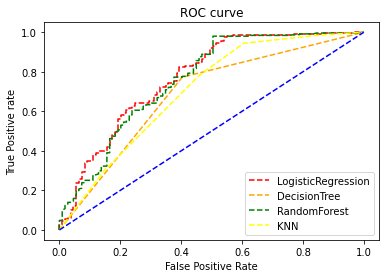

In [59]:
# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='red', label='LogisticRegression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='DecisionTree')
plt.plot(fpr_clf, tpr_clf, linestyle='--',color='green', label='RandomForest')
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='yellow', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [60]:
#saving the model
import joblib
joblib.dump(lr,"loan.pkl")

['loan.pkl']